In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error  # Example function from sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [46]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\powerconsumption.csv\powerconsumption.csv")

In [48]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [50]:
df['Datetime']= pd.to_datetime(df['Datetime'])
df['Datetime']

0       2017-01-01 00:00:00
1       2017-01-01 00:10:00
2       2017-01-01 00:20:00
3       2017-01-01 00:30:00
4       2017-01-01 00:40:00
                ...        
52411   2017-12-30 23:10:00
52412   2017-12-30 23:20:00
52413   2017-12-30 23:30:00
52414   2017-12-30 23:40:00
52415   2017-12-30 23:50:00
Name: Datetime, Length: 52416, dtype: datetime64[ns]

In [25]:
df.set_index('Datetime', inplace=True)

In [27]:
df['Date'] = df.index.date
df['Date']
df['Time'] = df.index.time

In [16]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time
Datetime,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00


In [31]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [33]:
df_hourly = numeric_df.resample('H').mean()
df_hourly

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433
...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,37513.814957,32497.698680,16926.770708
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988,32020.251610,16998.799520
2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,35358.174905,30757.901197,16608.883553


In [74]:
df.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Date                      0
Time                      0
dtype: int64

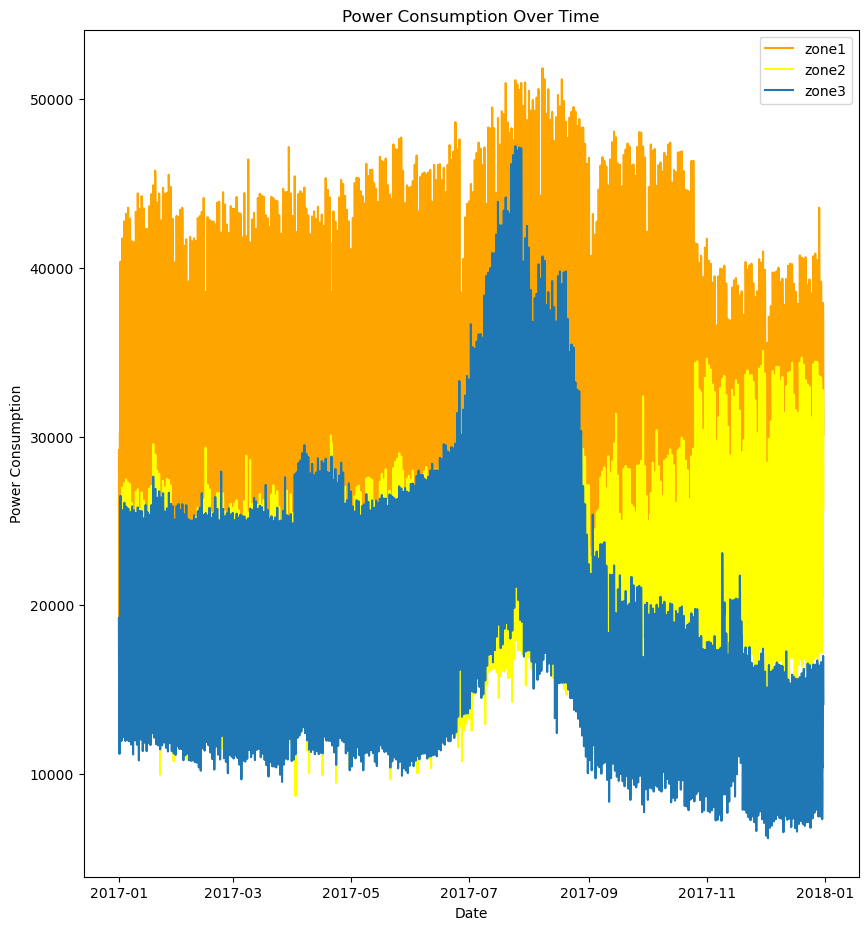

In [139]:
plt.figure(figsize=(10,11))
plt.plot(df_hourly.index, df_hourly['PowerConsumption_Zone1'],label = 'zone1', color = 'orange')
plt.plot(df_hourly.index, df_hourly['PowerConsumption_Zone2'],label = 'zone2',color = 'yellow')
plt.plot(df_hourly.index, df_hourly['PowerConsumption_Zone3'],label = 'zone3')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.legend()
plt.show()

In [20]:
df.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
Date                       object
Time                       object
dtype: object

In [111]:
df.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
Date                       object
Time                       object
dtype: object

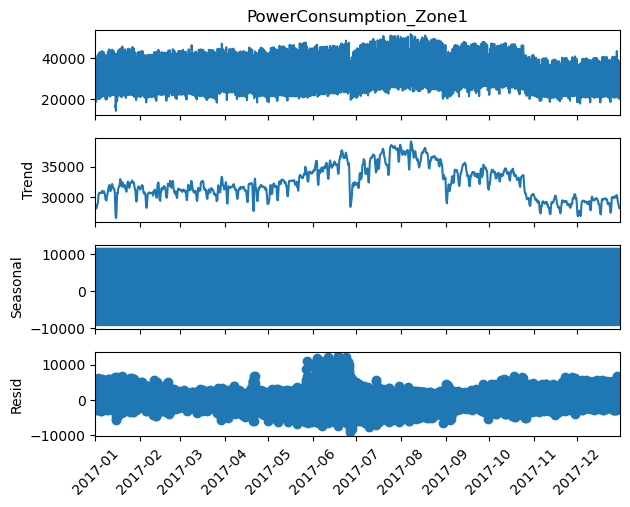

In [26]:
decomposition = seasonal_decompose(df_hourly['PowerConsumption_Zone1'], model = 'additive')
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

In [34]:
model = ARIMA(df_hourly['PowerConsumption_Zone1'],order =(5,1,0))
model_fit = model.fit()
model_fit.summary() #03164418830 ma

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   No. Observations:                 8736
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -79175.924
Date:                    Tue, 03 Sep 2024   AIC                         158363.848
Time:                            16:02:26   BIC                         158406.298
Sample:                        01-01-2017   HQIC                        158378.314
                             - 12-30-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7291      0.008     94.561      0.000       0.714       0.744
ar.L2         -0.2056      0.013    -15.260      0.000      -0.232      -0.179
ar.L3          0.0234      0.015      1.611      0.107      -0.005       0.052
ar.L4         -0.1162      0.016     -7.246      0.000      -0.148      -0.085
ar.L5         -0.0481      0.014     -3.542      0.000      -0.075      -0.021
sigma2      4.325e+06   4.38e+04     98.841      0.000    4.24e+06    4.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              4630.55
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

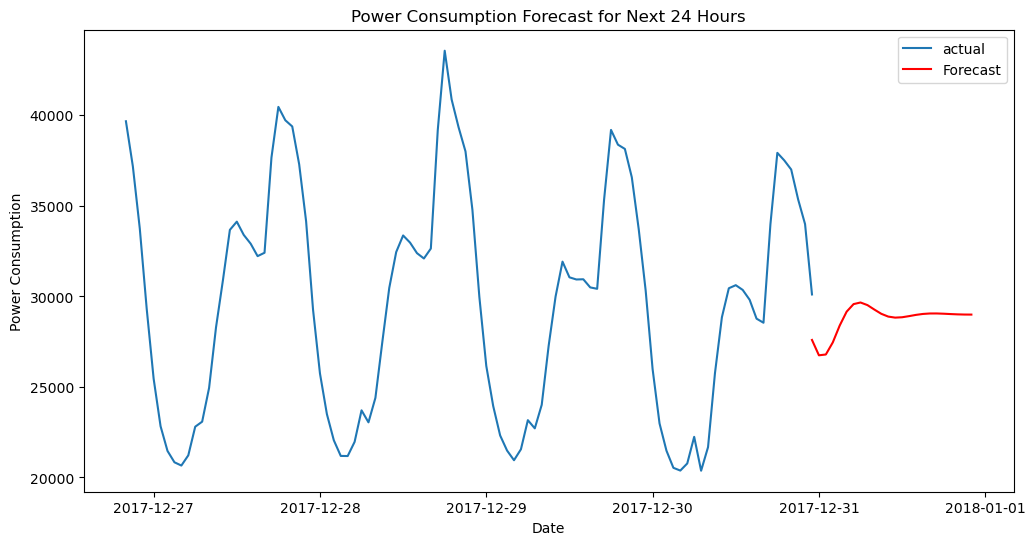

In [36]:
# Forecasting and Visualization
forecast = model_fit.forecast(steps = 24)
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index[-100:], df_hourly['PowerConsumption_Zone1'].iloc[-100:], label = 'actual')
plt.plot(pd.date_range(df_hourly.index[-1],periods = 24,freq ='H'),forecast,label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for Next 24 Hours')
plt.legend()
plt.show()

In [38]:
## Calculate error metrics
train_size = int(len(df_hourly) * 0.8)
train, test = df_hourly['PowerConsumption_Zone1'][:train_size], df_hourly['PowerConsumption_Zone1'][train_size:]

# Refit the model on the training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the test data
forecast_test = model_fit.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast_test)
rmse = mse ** 0.5

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 6686.814688487371


# week_6_TASK-3

In [72]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time
Datetime,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00


In [125]:
if 'Datetime' in df.columns:
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day
    df['Hour'] = df['Datetime'].dt.hour

In [106]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(df)
    return df


In [115]:
  print(df)


                 Datetime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.10

In [135]:
#Feature Engineering
df['Year'] = df['Datetime'].dt.year
df['Year'] 
 

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
52411    2017
52412    2017
52413    2017
52414    2017
52415    2017
Name: Year, Length: 52416, dtype: int32

In [129]:
 df['Month'] = df['Datetime'].dt.month
 df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
52411    12
52412    12
52413    12
52414    12
52415    12
Name: Month, Length: 52416, dtype: int32

In [131]:
df['Day'] = df['Datetime'].dt.day
df['Day'] 


0         1
1         1
2         1
3         1
4         1
         ..
52411    30
52412    30
52413    30
52414    30
52415    30
Name: Day, Length: 52416, dtype: int32

In [133]:
df['Hour'] = df['Datetime'].dt.hour
df['Hour']

0         0
1         0
2         0
3         0
4         0
         ..
52411    23
52412    23
52413    23
52414    23
52415    23
Name: Hour, Length: 52416, dtype: int32

In [165]:
# Scaling and Normalization
scaler = MinMaxScaler()
normalize = scaler.fit_transform(numeric_df)
normalize

array([[0.09009058, 0.74838246, 0.0051298 , ..., 0.        , 0.        ,
        0.        ],
       [0.0861464 , 0.75676971, 0.0051298 , ..., 0.        , 0.        ,
        0.        ],
       [0.08339907, 0.75676971, 0.00466345, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09936621, 0.73640067, 0.00559614, ..., 1.        , 0.96666667,
        1.        ],
       [0.09550363, 0.73879703, 0.00466345, ..., 1.        , 0.96666667,
        1.        ],
       [0.09066181, 0.75197699, 0.0048189 , ..., 1.        , 0.96666667,
        1.        ]])

In [167]:
df_normalize = pd.DataFrame(normalize,columns=numeric_df.columns)
df_normalize 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368,0.0,0.0,0.000000,0.0
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731,0.0,0.0,0.000000,0.0
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626,0.0,0.0,0.000000,0.0
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165,0.0,0.0,0.000000,0.0
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,0.322796,0.300199,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.450675,0.634246,0.212301,0.0,1.0,0.966667,1.0
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.431618,0.608847,0.203864,0.0,1.0,0.966667,1.0
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.409703,0.579491,0.188927,0.0,1.0,0.966667,1.0
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.393187,0.559197,0.181874,0.0,1.0,0.966667,1.0


In [173]:
df[numeric_df.columns] = df_normalize 
df[numeric_df.columns] 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368,0.0,0.0,0.000000,0.0
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731,0.0,0.0,0.000000,0.0
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626,0.0,0.0,0.000000,0.0
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165,0.0,0.0,0.000000,0.0
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,0.322796,0.300199,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.450675,0.634246,0.212301,0.0,1.0,0.966667,1.0
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.431618,0.608847,0.203864,0.0,1.0,0.966667,1.0
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.409703,0.579491,0.188927,0.0,1.0,0.966667,1.0
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.393187,0.559197,0.181874,0.0,1.0,0.966667,1.0


In [175]:
df.head(4)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour
0,2017-01-01 00:00:00,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368,0.0,0.0,0.0,0.0
1,2017-01-01 00:10:00,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731,0.0,0.0,0.0,0.0
2,2017-01-01 00:20:00,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626,0.0,0.0,0.0,0.0
3,2017-01-01 00:30:00,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165,0.0,0.0,0.0,0.0


# week_6_Task-4

In [231]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output


# Create visualizations using Plotly

# Interactive Line Chart (e.g., Power Consumption over Time for Zone 1)
fig_line = px.line(df, x='Datetime', y='PowerConsumption_Zone1', title='Power Consumption in Zone 1 Over Time')

# Interactive Scatter Plot (e.g., Temperature vs Power Consumption for Zone 1)
fig_scatter = px.scatter(df, x='Temperature', y='PowerConsumption_Zone1', color='WindSpeed', 
                         title='Power Consumption vs. Temperature in Zone 1')

# 3D Scatter Plot (e.g., Temperature, Humidity, and Power Consumption for Zone 1)
fig_3d = px.scatter_3d(df, x='Temperature', y='Humidity', z='PowerConsumption_Zone1', 
                      color='WindSpeed', title='3D Scatter Plot of Power Consumption in Zone 1')

# Heatmap (e.g., Power Consumption across Zones)
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=[df['PowerConsumption_Zone1'], df['PowerConsumption_Zone2'], df['PowerConsumption_Zone3']],
                   x=df['Datetime'],
                   y=['Zone 1', 'Zone 2', 'Zone 3'],
                   colorscale='Viridis'))

fig_heatmap.update_layout(title='Power Consumption Heatmap Across Zones')

# Build the Dash application
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Power Consumption Dashboard"),
    
    # Dropdown for selecting zone
    dcc.Dropdown(
        id='zone-dropdown',
        options=[
            {'label': 'Zone 1', 'value': 'PowerConsumption_Zone1'},
            {'label': 'Zone 2', 'value': 'PowerConsumption_Zone2'},
            {'label': 'Zone 3', 'value': 'PowerConsumption_Zone3'}
        ],
        value='PowerConsumption_Zone1',
        clearable=False
    ),
    
    # Graphs
    dcc.Graph(
        id='line-chart',
        figure=fig_line
    ),
    
    dcc.Graph(
        id='scatter-chart'
    ),
    
    dcc.Graph(
        id='3d-scatter-chart',
        figure=fig_3d
    ),
    
    dcc.Graph(
        id='heatmap',
        figure=fig_heatmap
    )
])

# Callback to update scatter plot based on selected zone
@app.callback(
    Output('scatter-chart', 'figure'),
    Input('zone-dropdown', 'value')
)
def update_scatter(selected_zone):
    fig = px.scatter(df, x='Temperature', y=selected_zone, color='WindSpeed')
    fig.update_layout(title=f'Temperature vs {selected_zone}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# week_6_TASK-5

In [68]:
df['Hour'] = df['Datetime'].dt.hour  # Hour of the day
df['Day_of_week'] = df['Datetime'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['Is_weekend'] = np.where(df['Day_of_week'] >= 5, 1, 0)  # 1 for weekend (Saturday, Sunday), 0 for weekday

df['Hour']
df['Is_weekend']
df['Day_of_week']

0        6
1        6
2        6
3        6
4        6
        ..
52411    5
52412    5
52413    5
52414    5
52415    5
Name: Day_of_week, Length: 52416, dtype: int32

In [64]:
# Step 2: Hypothesis Testing

# Hypothesis 1: Does power consumption differ between weekdays and weekends?
weekday_consumption = df[df['Is_weekend'] == 0]['PowerConsumption_Zone1']
weekend_consumption = df[df['Is_weekend'] == 1]['PowerConsumption_Zone1']

weekday_consumption 
weekend_consumption

0        34055.69620
1        29814.68354
2        29128.10127
3        28228.86076
4        27335.69620
            ...     
52411    31160.45627
52412    30430.41825
52413    29590.87452
52414    28958.17490
52415    28349.80989
Name: PowerConsumption_Zone1, Length: 14976, dtype: float64

In [66]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(weekday_consumption, weekend_consumption)
print(f'T-test results (Weekdays vs Weekends): t_statistic = {t_stat}, p_value = {p_value}')

# Hypothesis 2: Is there a significant correlation between temperature and power consumption?
corr_temp_consumption, p_corr_temp = stats.pearsonr(df['Temperature'], df['PowerConsumption_Zone1'])
print(f'Pearson correlation (Temperature vs Power Consumption): correlation = {corr_temp_consumption}, p_value = {p_corr_temp}')

T-test results (Weekdays vs Weekends): t_statistic = 16.867736256307015, p_value = 1.1449347937766378e-63
Pearson correlation (Temperature vs Power Consumption): correlation = 0.44022078902914097, p_value = 0.0


In [75]:

df['Day_of_week'] = df['Datetime'].dt.dayofweek
df['Is_weekend'] = df['Day_of_week'] >= 5

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Power Consumption Dashboard", style={'text-align': 'center'}),

    # Dropdown for selecting the zone
    dcc.Dropdown(
        id='zone-dropdown',
        options=[
            {'label': 'Zone 1', 'value': 'PowerConsumption_Zone1'},
            {'label': 'Zone 2', 'value': 'PowerConsumption_Zone2'},
            {'label': 'Zone 3', 'value': 'PowerConsumption_Zone3'}
        ],
        value='PowerConsumption_Zone1',
        style={'width': '50%'}
    ),

    # Date picker for selecting the date range
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['Datetime'].min(),
        end_date=df['Datetime'].max(),
        display_format='Y-MM-DD'
    ),

    # Graph to display power consumption data
    dcc.Graph(id='consumption-graph'),

    # Radio buttons for toggling between Weekdays/Weekends
    dcc.RadioItems(
        id='weekend-radio',
        options=[
            {'label': 'All Days', 'value': 'all'},
            {'label': 'Weekdays', 'value': 'weekday'},
            {'label': 'Weekends', 'value': 'weekend'}
        ],
        value='all',
        labelStyle={'display': 'inline-block'}
    )
])

# Callback to update the graph based on user input
@app.callback(
    Output('consumption-graph', 'figure'),
    [
        Input('zone-dropdown', 'value'),
        Input('date-picker-range', 'start_date'),
        Input('date-picker-range', 'end_date'),
        Input('weekend-radio', 'value')
    ]
)
def update_graph(selected_zone, start_date, end_date, selected_day_type):
    # Filter data based on date range
    filtered_df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

    # Filter based on Weekday/Weekend selection
    if selected_day_type == 'weekday':
        filtered_df = filtered_df[filtered_df['Is_weekend'] == 0]
    elif selected_day_type == 'weekend':
        filtered_df = filtered_df[filtered_df['Is_weekend'] == 1]

    # Create the time-series plot
    fig = px.line(
        filtered_df, x='Datetime', y=selected_zone,
        title=f"Power Consumption in {selected_zone} Over Time",
        labels={'Datetime': 'Date', selected_zone: 'Power Consumption'}
    )
    
    # Update the layout for better readability
    fig.update_layout(xaxis_title='Date', yaxis_title='Power Consumption (kWh)', template='plotly_dark')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
